## 1. Set up a Git repository to allow you to collaborate on the Python solution.

## 2.  Read the daily confirmed cases and deaths into two dataframes can be found at this GitHub page...

##  3. Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level (daily total of all the countries). NOTE, the CSV contains data country and state/province wise.

In [2]:
import pandas as pd
confirmed_cases_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [5]:
df_confirmed_raw = pd.read_csv(confirmed_cases_url)
df_deaths_raw = pd.read_csv(deaths_url)

In [3]:
df_confirmed_raw.head()     # a glance at the dataset

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [4]:
df_deaths_raw.head()    # a glance at the dataset

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


## 4. For any given date, you should be able to create/generate a dataframe of the total confirmed cases and deaths for all the countries in the world (Hint: a dictionary where the date is the key, and the corresponding value is a dataframe).

In [3]:
from datetime import datetime
def convert_date(date):
    datetime_obj = datetime.strptime(date, "%m/%d/%y")  # convert the date data in the covid dataset for convinience for questions later
    new_date_format = datetime_obj.strftime("%Y-%m-%d")
    return new_date_format

test = '1/22/20'    # test the function
print(convert_date(test))

2020-01-22


In [6]:
dic_country = {}    # the dictionary as required, will be useful in later questions.

df_filtered = df_confirmed_raw.iloc[:, 4:]  # select the date data starting from the 5th colomn and make it into a new dataframe

for column in df_filtered.columns:  # extract the confirm and death data by a for loop
    date = column   # df_filtered only contains date data
    country_data = pd.DataFrame({
        'Country/Region': df_confirmed_raw['Country/Region'],  
        'Confirmed': df_confirmed_raw[column],
        'Deaths': df_deaths_raw[column]
    })
    grouped_data = country_data.groupby('Country/Region').sum().reset_index()   # calculate the sum and make each dataframe group by country
    dic_country[convert_date(date)] = grouped_data      # store grouped data in the dictionary with date as key, as required

test_date = dic_country.get('2021-05-15')   # test my birthday
test_date

,Country/Region,Confirmed,Deaths
0,Afghanistan,63412,2733
1,Albania,131978,2429
2,Algeria,125194,3366
3,Andorra,13510,127
4,Angola,30354,655
...,...,...,...
196,West Bank and Gaza,303658,3423
197,Winter Olympics 2022,0,0
198,Yemen,6538,1285
199,Zambia,92409,1260


In [9]:
dic_global = {}     # same method as above, group the dic_country into a global one

for date, data in dic_country.items():
    global_confirmed_total = data['Confirmed'].sum()        # sum up confirmed and deaths for each date
    global_deaths_total = data['Deaths'].sum()
    df_global = pd.DataFrame({
        'Confirmed': [global_confirmed_total],
        'Deaths': [global_deaths_total],
    })
    dic_global[date] = df_global

test_date = dic_global.get('2022-05-15')  # test my birthday
test_date

,Confirmed,Deaths
0,521997492,6291822


## 5. Extract the total confirmed cases and deaths for Saskatchewan into a dataframe.

In [10]:
sask_confirmed = df_confirmed_raw[df_confirmed_raw['Province/State'] == 'Saskatchewan'].iloc[:, 4:].sum().values     # filter the Sasktachewan data
sask_deaths = df_deaths_raw[df_deaths_raw['Province/State'] == 'Saskatchewan'].iloc[:, 4:].sum().values       # filter the Sasktachewan data

dates_sask = df_confirmed_raw.columns[4:]  # only need the data starting from the 5th column

sask_totals = pd.DataFrame({
    'Date': dates_sask,
    'Confirmed': sask_confirmed,
    'Deaths': sask_deaths
})
sask_totals

,Date,Confirmed,Deaths
0,1/22/20,0,0
1,1/23/20,0,0
2,1/24/20,0,0
3,1/25/20,0,0
4,1/26/20,0,0
...,...,...,...
1138,3/5/23,153255,1882
1139,3/6/23,153651,1890
1140,3/7/23,153651,1890
1141,3/8/23,153651,1890


## 6. Research and pick two stocks from the list of following industries (it will be used in the next step):

#### Apple (NASDAQ: AAPL)

#### Airbnb (NASDAQ:ABNB) 

## 7. Use AlphaVantage (use the API Key = 'TC54JI2GWZOZ8I0J') to get the daily high and low prices for your selected stocks.

In [11]:
import requests


def fetch_stock_data(symbol, start_date, end_date):     # create a function to get stock data from AlphaVantage
    api_key = 'TC54JI2GWZOZ8I0J'
    base_url = 'https://www.alphavantage.co/query'
    params = {
        'function': 'TIME_SERIES_DAILY',
        'symbol': symbol,
        'apikey': api_key,
        'outputsize': 'full'
    }

    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        stock_data = response.json()['Time Series (Daily)']
        filtered_data = {
            date: {
                'High': float(data['2. high']),     # only need the high and low prices as required
                'Low': float(data['3. low'])
            }
            for date, data in stock_data.items()
            if start_date <= date <= end_date   # set the time range
        }
        return filtered_data
    else:
        print('Failed to fetch data')
        return None

apple_data = fetch_stock_data('AAPL', '2022-01-20', '2023-03-29')   # the time range aligns with the covid data
airbnb_data = fetch_stock_data('ABNB', '2022-01-20', '2023-03-29')

In [13]:
stock_data_dict = {}    # set a new dictionary for later combination with covid dictionary
for date in dic_global.keys():      
    if date in apple_data and date in airbnb_data:      # check if the date exists in both apple_data and airbnb_data
        stock_info = {
            'Apple High': apple_data[date]['High'],
            'Apple Low': apple_data[date]['Low'],
            'Airbnb High': airbnb_data[date]['High'],
            'Airbnb Low': airbnb_data[date]['Low']
        }
        stock_data_dict[date] = pd.DataFrame(stock_info, index=[date])  # Create a DataFrame with stock info for this date
        stock_data_dict[date].reset_index(inplace = True, drop = True)

In [14]:
stock_data_dict.get('2022-01-31')   # test the stock dictionary

,Apple High,Apple Low,Airbnb High,Airbnb Low
0,175.0,169.51,153.97,143.81


In [15]:
dic_global.get('2022-12-01')    # test the covid global dictionary

,Confirmed,Deaths
0,643950364,6638794


## 8. Append that info to the data frame created in step 3.

In [17]:
for date, stock_df in stock_data_dict.items():  # concatenate the stock data dataframe with the covid dataframe
    if date in dic_global:      # the date is based on covid data, not on stock data.
        df_combined = pd.concat([dic_global[date], stock_df], axis=1)
        dic_global[date] = df_combined  # replace the data back to global dictionary. On weekends and holidays there should be no stock data.

In [18]:
dic_global.get('2022-01-20')    # test a normal Thursday, should contain stock prices.

,Confirmed,Deaths,Apple High,Apple Low,Airbnb High,Airbnb Low
0,343341570,5610150,169.68,164.18,165.2,157.35


In [19]:
dic_global.get('2022-01-22')    # test a normal Saturday, should not contain stock prices.

,Confirmed,Deaths
0,349801473,5626133


## 9. Visualizations: For all the graphs, there should be appropriate titles, axis labels, font sizes.

## 9.a For the year 2022, create an appropriate graph(s) that shows the effect of COVID-19 on selected stock prices. Highlight on the graph if you notice any sharp change while comparing values. Consider the data range when you are comparing values in the graph. Explain why you chose the graph(s). You may use Matplotlib, Seaborn or Plotly library for graphs. [30 marks]

In [20]:
# create all the lists we need to store the data
dates = []
confirmed_cases = []
deaths_cases = []
apple_high = []
apple_low = []
airbnb_high = []
airbnb_low = []

# extract data for confirmed cases
for date, data_frame in dic_global.items():
    if 'Apple High' in data_frame.columns and 'Apple Low' in data_frame.columns:
        if '2022' in date:      # extract the data in 2022 as required
            dates.append(date)
            confirmed_cases.append(data_frame.loc[0, 'Confirmed'])
            deaths_cases.append(data_frame.loc[0, 'Deaths'])
            apple_high.append(data_frame.loc[0, 'Apple High'])
            apple_low.append(data_frame.loc[0, 'Apple Low'])
            airbnb_high.append(data_frame.loc[0, 'Airbnb High'])
            airbnb_low.append(data_frame.loc[0, 'Airbnb Low'])

In [21]:
length = 3  # Define a sharp change happen in 3 days
sharp_apple_changes = []
sharp_airbnb_changes = []

for i in range(len(apple_high)):
    if i + length < len(apple_high):
        max_apple_price = max(apple_high[i:i+length])   # the highest prices of apple in 3 days range
        min_apple_price = min(apple_low[i:i+length])    # the lowest prices of apple in 3 days range
        max_airbnb_price = max(airbnb_high[i:i+length])
        min_airbnb_price = min(airbnb_low[i:i+length])
        
        if max_apple_price / min_apple_price > 1.1 or max_apple_price / min_apple_price < 0.9:  # here I define if Apple's prices flucutate more than 10% in 3 days then it's sharp change
            sharp_apple_changes.extend((i,i+1,i+2,i+3))     # store the dates into the list for drawing graph later
        else:
            sharp_apple_changes.append(None)
            
        if max_airbnb_price / min_airbnb_price > 1.15 or max_airbnb_price / min_airbnb_price < 0.85:    # here I define if Airbnb's prices flucutate more than 15% in 3 days then it's sharp change
            sharp_airbnb_changes.extend((i,i+1,i+2,i+3))    # store the dates into the list for drawing graph later
        else:
            sharp_airbnb_changes.append(None)   

In [23]:
# a glance of the data we collected from the code above
print(len(dates))
print(len(confirmed_cases))
print(len(apple_high))
print(len(apple_low))
print(len(airbnb_high))
print(len(airbnb_low))
print(len(sharp_airbnb_changes))
print([i for i in range(len(sharp_airbnb_changes)) if sharp_airbnb_changes[i] != None]) # the date when Apple have sharp changes
print([i for i in range(len(sharp_apple_changes)) if sharp_apple_changes[i] != None])   # the date when Airbnb have sharp changes

239
239
239
239
239
239
323
[0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 14, 15, 22, 23, 24, 25, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 72, 73, 74, 75, 108, 109, 110, 111, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 172, 173, 174, 175, 233, 234, 235, 236, 237, 238, 239, 240, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 284, 285, 286, 287, 304, 305, 306, 307]
[5, 6, 7, 8, 79, 80, 81, 82, 83, 84, 85, 86, 91, 92, 93, 94, 109, 110, 111, 112, 212, 213, 214, 215, 216, 217, 218, 219, 224, 225, 226, 227, 250, 251, 252, 253]


#### The visualization of stock prices and their sharp changes, along with covid-19 confirm and deaths
#### Why I choose candle and line graphs:
#### - The candle graph can best show the stock prices containing high and low prices, and their general trends over time.
#### - The line graphs can best show the trends of Covid-19 confirm and deaths over time.
#### - I combined them together to provide a clear and general picture of their trends over time. Detailed graphes will be provided later.

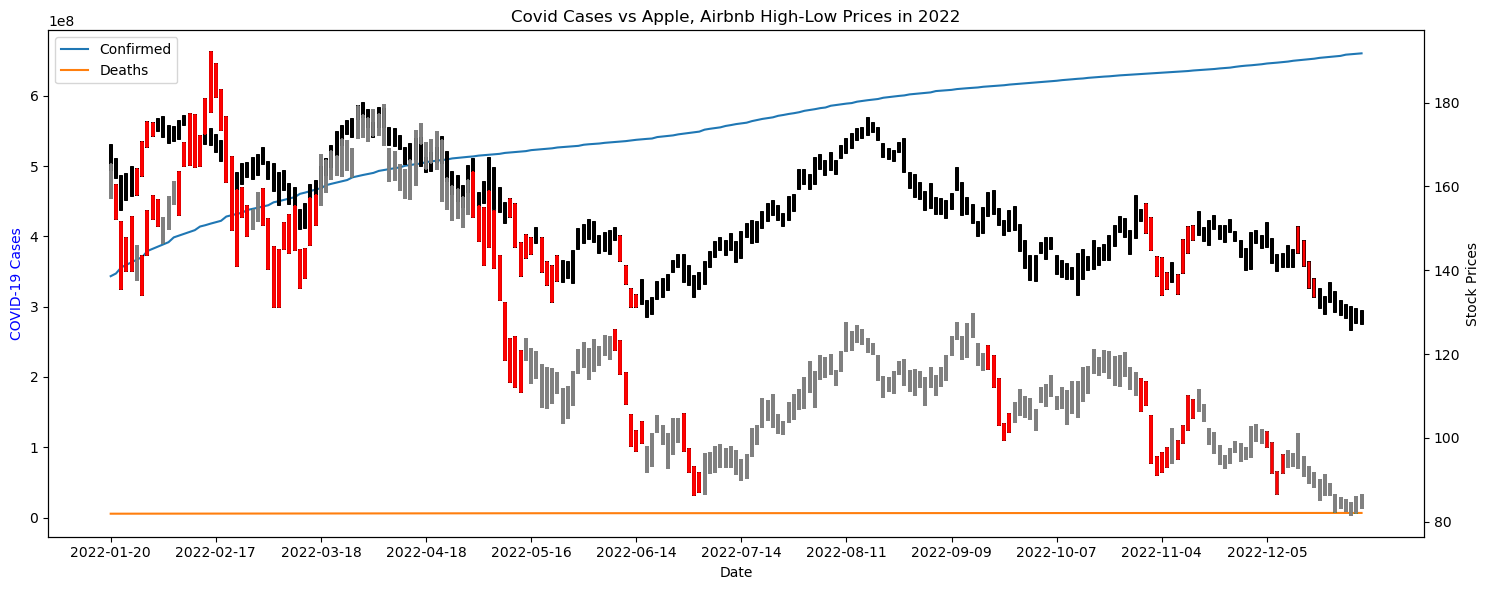

In [24]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(15, 6))    # first the covid graph as ax1
ax1.plot(dates, confirmed_cases, label='Confirmed')
ax1.plot(dates, deaths_cases, label='Deaths')
ax1.set_xlabel('Date')
ax1.set_ylabel('COVID-19 Cases', color='blue')
ax1.tick_params(axis='y')
ax1.legend()

# second the stock graph as ax2
ax2 = ax1.twinx()  # create a secondary y-axis
for i in range(len(apple_high)):    # the length of apple_high is acutally the number of stock prices, 239 trading days in 2022
    for change in sharp_apple_changes:
        if change:
            ax2.plot([dates[change], dates[change]], [apple_high[change], apple_low[change]], color='red')  # highlight the sharp change as required
        else:
            ax2.plot([dates[i], dates[i]], [apple_high[i], apple_low[i]], color='black')    # the normal Apple days in black color 
    for change in sharp_airbnb_changes:
        if change:
            ax2.plot([dates[change], dates[change]], [airbnb_high[change], airbnb_low[change]], color='red')
        else:
            ax2.plot([dates[i], dates[i]], [airbnb_high[i], airbnb_low[i]], color='grey')   # the normal Airbnb days in grey color 

ax2.set_ylabel('Stock Prices', color='black')
ax2.tick_params(axis='y', labelcolor='black')
plt.title('Covid Cases vs Apple, Airbnb High-Low Prices in 2022')
plt.xticks(dates[::20], rotation=0)     # otherwise the date in x-axis will be too crowded
plt.tight_layout()

#### - I used the line graph to show the impact(correlation) of covide-19 confirm cases on the stock prices below, because the linear graph can better show the general trends and the comparison between a predicted trend and actual trend.
#### - With a linear regression model, I evaluate the detailed impact(correlation) mainly by the R square of the regression. Detailed model performance parameters showed below the graph.
#### - As we can see, the prediction line by confirmed cases matches with the general trend line of actual stock prices.
#### - According to the results, the confirm cases have negative impact(correlation) on stock prices, for the coefficients are negative in both scenarios.
#### - Strictly speaking, I can only show the correlation between the confirm cases and stock prices, the causality may not be easily proved.

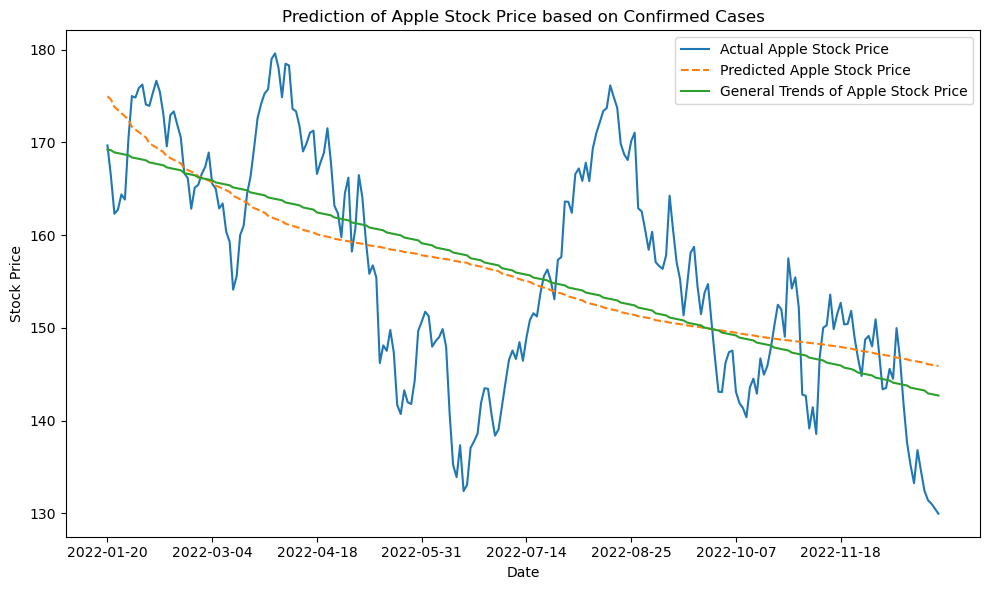

Coefficients: [-9.176625e-08]
Intercept: 206.4845656672228
Mean squared error: 101.24900370320437
Coefficient of determination (R^2): 0.3457291906499258


In [39]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = np.array(confirmed_cases).reshape(-1, 1)  # confirmed cases as input feature
y = np.array(apple_high)  # choose apple's stock high price as target and for the convinience

model = LinearRegression()  # create and fit the model
model.fit(X, y)
predicted_apple_prices = model.predict(X)   # for drawing the graph

dates_datetime = [datetime.strptime(date, '%Y-%m-%d') for date in dates]    # format the date "2022-02-02"
dates_ordinal = [date.toordinal() for date in dates_datetime]
model_date = LinearRegression()     # a simple trends line
model_date.fit(np.array(dates_ordinal).reshape(-1, 1), apple_high)
general_trends_apple = model_date.predict(np.array(dates_ordinal).reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(dates, apple_high, label='Actual Apple Stock Price')
plt.plot(dates, predicted_apple_prices, label='Predicted Apple Stock Price', linestyle='--')
plt.plot(dates, general_trends_apple, label='General Trends of Apple Stock Price', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Prediction of Apple Stock Price based on Confirmed Cases')
plt.xticks(dates[::30], rotation=0)    # same reason as above, in case of a too crowded x-axis
plt.legend()
plt.tight_layout()
plt.show()

# show the model results
print('Coefficients:', model.coef_)     
print('Intercept:', model.intercept_)
print('Mean squared error:', mean_squared_error(y, predicted_apple_prices))
print('Coefficient of determination (R^2):', r2_score(y, predicted_apple_prices))

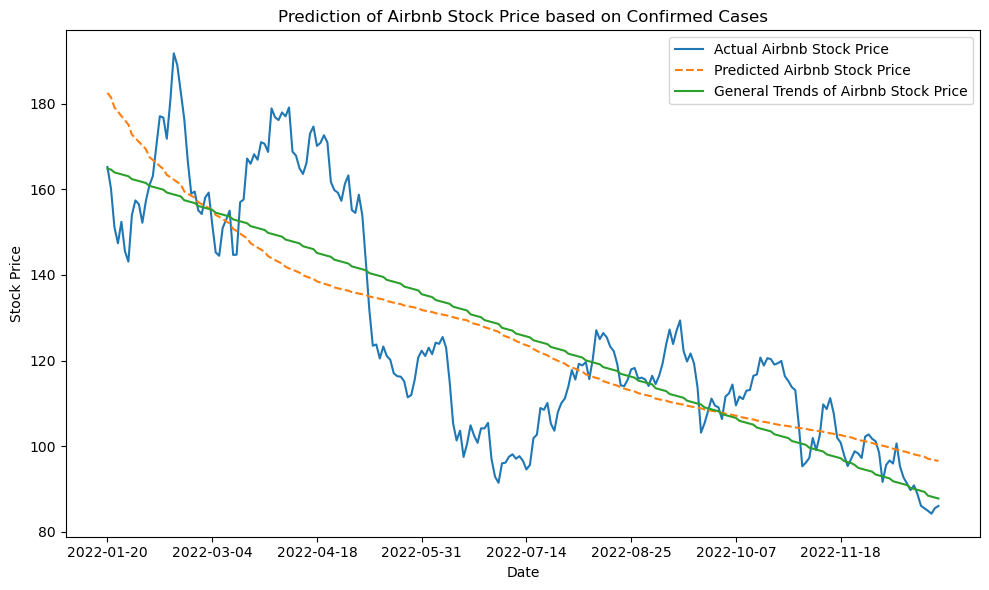

Coefficients: [-2.71185741e-07]
Intercept: 275.6025156849404
Mean squared error: 279.86392811163347
Coefficient of determination (R^2): 0.6253999814806743


In [40]:
X = np.array(confirmed_cases).reshape(-1, 1)  # confirmed cases as input feature
y = np.array(airbnb_high)  # choose airbnb's stock high price as target and for the convinience

model = LinearRegression()
model.fit(X, y)
predicted_airbnb_prices = model.predict(X)

model_date = LinearRegression()     # a simple trends line
model_date.fit(np.array(dates_ordinal).reshape(-1, 1), airbnb_high)
general_trends_airbnb = model_date.predict(np.array(dates_ordinal).reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(dates, airbnb_high, label='Actual Airbnb Stock Price')
plt.plot(dates, predicted_airbnb_prices, label='Predicted Airbnb Stock Price', linestyle='--')
plt.plot(dates, general_trends_airbnb, label='General Trends of Airbnb Stock Price', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Prediction of Airbnb Stock Price based on Confirmed Cases')
plt.xticks(dates[::30], rotation=0)    # same reason as above, in case of a too crowded x-axis
plt.legend()
plt.tight_layout()
plt.show()

# show the model results
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error:', mean_squared_error(y, predicted_airbnb_prices))
print('Coefficient of determination (R^2):', r2_score(y, predicted_airbnb_prices))

## 9.b Create a horizontal bar chart of the top 20 countries according to the confirmed COVID-19 numbers for a given date. The bars should be sorted in ascending order. Use a colormap. [30 marks]

/tmp/ipykernel_15648/2334499436.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = fig.colorbar(mappable)


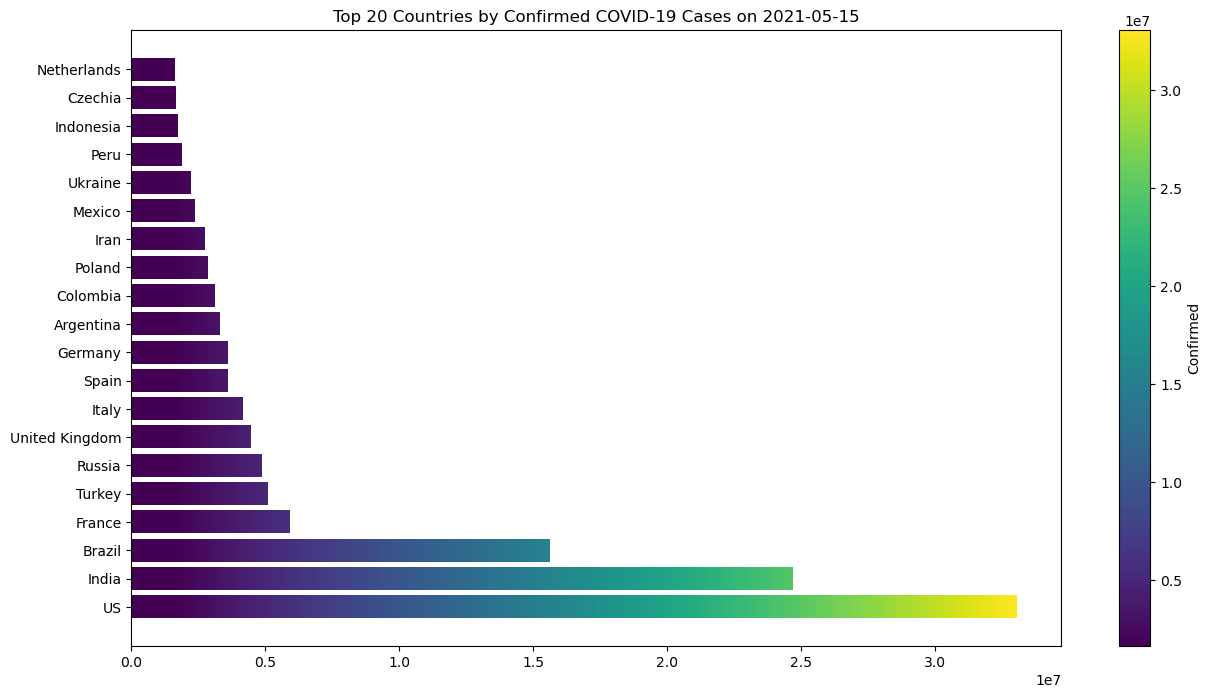

In [10]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

sample_date = '2021-05-15'
specific_date_data = dic_country.get(sample_date)
top_20_countries = specific_date_data.sort_values('Confirmed', ascending=False).head(20) # sort the data in ascending order and get the top 20 countries

norm = mcolors.Normalize(vmin=top_20_countries['Confirmed'].min(), vmax=top_20_countries['Confirmed'].max())    # normalize the data in each country
cmap = cm.viridis    # use the default colormap viridis
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)  # map the normalized values to the colormap
mappable.set_array(top_20_countries['Confirmed'])   # set the array


fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.barh(top_20_countries['Country/Region'], top_20_countries['Confirmed'])       # create a horizontal bar chart

# reference: https://stackoverflow.com/questions/72069575/matplotlib-horizontal-bar-plot-with-color-range
ax = bars[0].axes   # access the first bar's axis for further adjustments
lim = ax.get_xlim() + ax.get_ylim()   # the limitation of the axis
for bar, val in zip(bars, top_20_countries['Confirmed']):   # by a for loop to create a color gradient in each bar
    grad = np.atleast_2d(np.linspace(val, 0, 256))      # reversed order for horizontal bar chart
    bar.set_zorder(1)
    bar.set_facecolor('none')
    x, y = bar.get_xy()
    w, h = bar.get_width(), bar.get_height()
    ax.imshow(np.flip(grad), extent=[x, x + w, y, y + h], aspect='auto', zorder=1,interpolation='nearest', cmap=cmap, norm=norm)    # plot the color gradient for all bars
ax.axis(lim)    # applied the limitation of axis
cb = fig.colorbar(mappable)
cb.set_label("Confirmed")
ax.set_title('Top 20 Countries by Confirmed COVID-19 Cases on ' + sample_date)  # add the title
plt.show()